In [1]:
import imprl.structural_envs as structural_envs
from imprl.post_process.inference import HeuristicInference, AgentInference

### Environment

In [2]:
setting = "hard-5-of-5"
env = structural_envs.make(setting)
env.baselines

{'FailureReplace': {'mean': 23825.1, 'stderr': 50.3},
 'TPI-CBM': {'mean': 19728.42, 'stderr': 48.7, 'policy': 14}}

### Heuristic Inference

In [23]:
hi = HeuristicInference("failure_replace", env)

out = hi.run(1_000).mean()

Total costs | mean: 23814.17, std err: 162.38


In [24]:
hi = HeuristicInference("TPI-CBM", env) # Heuristic

out = hi.run(1_000)

Number of policies: 150
Total costs | mean: 19626.81, std err: 152.65


### Agent inference

In [3]:
algorithm = "DDQN"
TrainedAgent = AgentInference(algorithm, env) # initialize agent

# Load model
checkpt_dir = "data/run-j1fm9qvi/model_weights" 
ep = 20_000 # episode number
TrainedAgent.load_weights(checkpt_dir, ep)

Loaded default configuration for DDQN.


In [26]:
episodic_returns = TrainedAgent.run(1_000)

Total costs | mean: 13488.83, std err: 109.98


/Users/pbhustali/Documents/GitHub/imprl/imprl/post_process/plotter/rollout_plotter.py:179: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


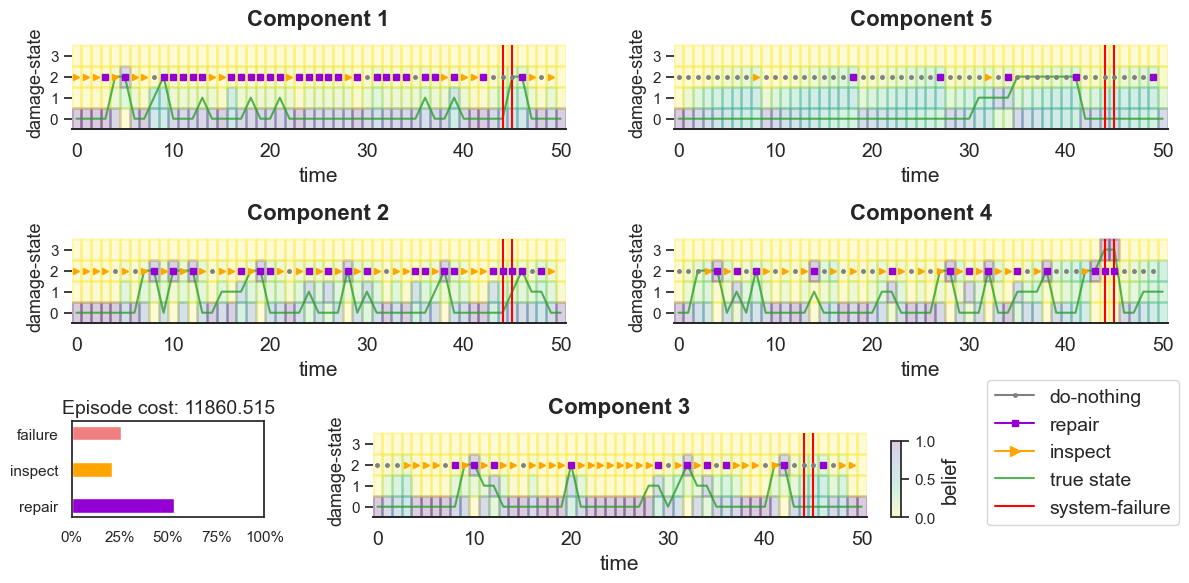

In [5]:
# save_fig_kwargs = {'fname': f'./rollout-{setting}-{algorithm}.png',
#                    'dpi': 300}

save_fig_kwargs = None

TrainedAgent.plot_rollout(save_fig_kwargs=save_fig_kwargs) # each call will plot a new rollout